In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({i: species for i, species in enumerate(iris.target_names)})
print(iris_df.shape)



(150, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Number of duplicate rows: 1
Number of duplicate rows: 0


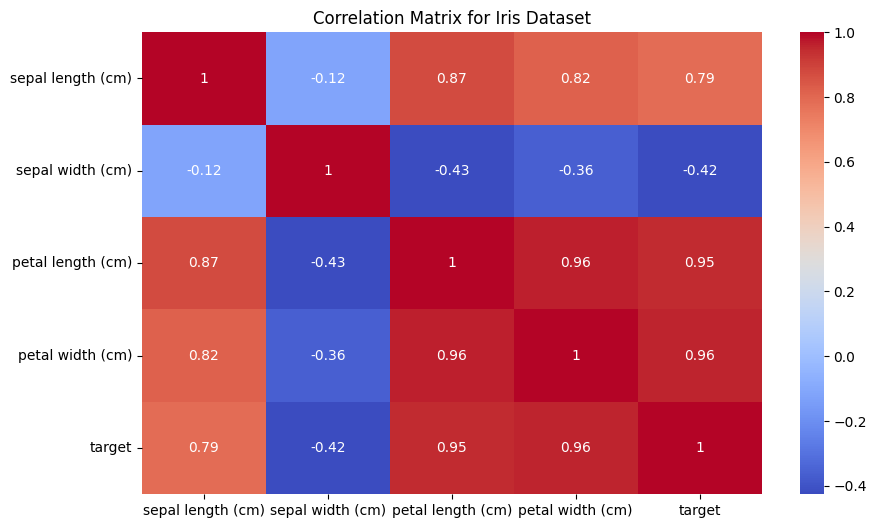

In [19]:
#duplicates, null values, eda, visualization,correlation matrix
iris_df.info()
duplicates = iris_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
#remove duplicates
iris_df = iris_df.drop_duplicates()
duplicates = iris_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
#correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = iris_df.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Iris Dataset')
plt.show()

In [20]:
scaler_standard = StandardScaler() 
iris_standardized = scaler_standard.fit_transform(iris_df[iris.feature_names])
df_scaled = pd.DataFrame(data=iris_standardized, columns=iris.feature_names)
df_scaled['target'] = iris_df['target']
df_scaled['species'] = iris_df['species']
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,-0.898033,1.012401,-1.333255,-1.308624,0.0,setosa
1,-1.139562,-0.137353,-1.333255,-1.308624,0.0,setosa
2,-1.381091,0.322549,-1.390014,-1.308624,0.0,setosa
3,-1.501855,0.092598,-1.276496,-1.308624,0.0,setosa
4,-1.018798,1.242352,-1.333255,-1.308624,0.0,setosa


In [21]:
iris_df.to_csv("iris_raw.csv", index=False)
df_scaled.to_csv("iris_scaled.csv", index=False)